# **Анализ связи количества самоубийств и уровня счастья населения в мире**

## Содержание
1. [Импортирование библиотек](#task1)
2. [Просмотр и описание данных](#task2)
    
    2.1 [Набор данных по количеству самоубийств в мире в перид с 2015 по 2019 гг](#task21)

    2.2 [Данные по Happy Planet Index](#task22)

    2.3 [Данные по World Hapiness Report](#task23)
3. [Подготовка даннх для статистического анализа](#task3) 
  
4. [Статистический анализ](#task4)  

    4.1 [Корреляция Пирсона](#task41)

    4.2 [Линейная регрессия](#task22)


# Импортирование библиотек
<a id='task1'></a>

Библиотека pandas потребуется для работы с данными в табличном представлении.

Библиотека numpy потребуется для округления данных в корреляционной матрице.

Библиотеки matplotlib, seaborn, plotly.express и pycountry потребуется для визуализации данных.

Библиотека sklearn потребуется для тестирования гипотез.


In [ ]:
#установка диаграммы - карты
!pip  install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=44235f1e810cbea0a5c235d8ec60468489be6e78062904f0d78076851050aa59
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno # для визуализации пропусков
import plotly.express as px # для визуализации
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
import pycountry

In [ ]:
countries = {} #создаем список стран из библиотеки pycountry для визуализации
for country in pycountry.countries:
    countries[country.name] = country.alpha_3 

# Просмотр и описание данных
<a id='task2'></a>

## Набор данных по количеству самоубийств в мире в перид с 2015 по 2019 гг 
<a id='task21'></a>

### Подготовка данных

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/liakzer/python/main/data/suicide.csv') # загружаем датасет по количеству самоубийств
df.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,87,Luxembourg,1,Male,7,10-14 years,718,Self-harm,3,Rate,2015,0.600719,0.915497,0.378528
1,1,Deaths,87,Luxembourg,2,Female,7,10-14 years,718,Self-harm,3,Rate,2015,0.240969,0.359380,0.163315
2,1,Deaths,87,Luxembourg,3,Both,7,10-14 years,718,Self-harm,3,Rate,2015,0.426492,0.599404,0.303130
3,1,Deaths,87,Luxembourg,1,Male,8,15-19 years,718,Self-harm,3,Rate,2015,6.405181,8.299568,4.856565
4,1,Deaths,87,Luxembourg,2,Female,8,15-19 years,718,Self-harm,3,Rate,2015,2.286117,3.070217,1.678625


In [ ]:
df.info() # смотрим типы данных и пропуски. Пропуски данных отсуствуют.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36720 entries, 0 to 36719
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     36720 non-null  int64  
 1   measure_name   36720 non-null  object 
 2   location_id    36720 non-null  int64  
 3   location_name  36720 non-null  object 
 4   sex_id         36720 non-null  int64  
 5   sex_name       36720 non-null  object 
 6   age_id         36720 non-null  int64  
 7   age_name       36720 non-null  object 
 8   cause_id       36720 non-null  int64  
 9   cause_name     36720 non-null  object 
 10  metric_id      36720 non-null  int64  
 11  metric_name    36720 non-null  object 
 12  year           36720 non-null  int64  
 13  val            36720 non-null  float64
 14  upper          36720 non-null  float64
 15  lower          36720 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 4.5+ MB


Пропуски даннх отсутсутвуют. Типы данных соотвествуют действительности.

In [ ]:
df1 = df.groupby('location_name')['val'].sum() # подсчитаем количество стран в списке
country_name = list(df1.index.get_level_values(0))
len(country_name)

204

In [ ]:
# сверяем имена стран, чтобы не было различий в написании
country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list

['Bolivia (Plurinational State of)',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Iran (Islamic Republic of)',
 'Micronesia (Federated States of)',
 'Palestine',
 'Republic of Korea',
 'Republic of Moldova',
 'Taiwan (Province of China)',
 'United Republic of Tanzania',
 'United States Virgin Islands',
 'United States of America',
 'Venezuela (Bolivarian Republic of)']

In [ ]:
# приводим написание к стандарту
df.replace('Bolivia (Plurinational State of)','Bolivia, Plurinational State of', inplace = True)
df.replace("Democratic People's Republic of Korea","Korea, Democratic People's Republic of", inplace = True)
df.replace('Democratic Republic of the Congo','Congo, The Democratic Republic of the', inplace = True)
df.replace('Iran (Islamic Republic of)','Iran, Islamic Republic of',inplace = True)
df.replace('Micronesia (Federated States of)','Micronesia, Federated States of',inplace = True)
df.replace('Palestine', 'Palestine, State of',inplace = True)
df.replace('Republic of Korea','Korea, Republic of', inplace = True)
df.replace('Republic of Moldova','Moldova, Republic of', inplace = True)
df.replace('United Republic of Tanzania','Tanzania, United Republic of', inplace = True)
df.replace('United States Virgin Islands','Virgin Islands, U.S.', inplace = True)
df.replace('Taiwan (Province of China)','Taiwan, Province of China', inplace = True)
df.replace('United States of America', 'United States',inplace = True)
df.replace('Venezuela (Bolivarian Republic of)','Venezuela, Bolivarian Republic of', inplace = True)


In [ ]:
df_count=df.groupby('location_name').count()  # проверим количество стран, которые имеют менее 180 значений. 180- это максимальное число повторений в таблице
df_count[(df_count['val']!=180)]

,measure_id,measure_name,location_id,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
location_name,,,,,,,,,,,,,,,


По результатам анализа, все страны в датасете повторяются одинаковое число раз, т.о. нет необходимости исключать страны при изучении динамики случаев суицида в период с 2015 по 2019гг

In [ ]:
df.describe()

,measure_id,location_id,sex_id,age_id,cause_id,metric_id,year,val,upper,lower
count,36720.0,36720.00000,36720.000000,36720.000000,36720.0,36720.0,36720.000000,36720.000000,36720.000000,36720.000000
mean,1.0,136.29902,2.000000,45.833333,718.0,3.0,2017.000000,15.618172,21.541222,10.903793
std,0.0,97.92294,0.816508,72.186893,0.0,0.0,1.414233,20.980677,29.837299,14.433658
min,1.0,6.00000,1.000000,7.000000,718.0,3.0,2015.000000,0.024270,0.046580,0.010700
25%,1.0,62.75000,1.000000,9.750000,718.0,3.0,2016.000000,3.990835,5.696688,2.589104
50%,1.0,122.50000,2.000000,12.500000,718.0,3.0,2017.000000,8.840984,12.276364,5.954233
75%,1.0,182.25000,3.000000,26.750000,718.0,3.0,2018.000000,18.286434,24.424073,13.308392
max,1.0,522.00000,3.000000,243.000000,718.0,3.0,2019.000000,246.268197,440.731498,153.045308


In [ ]:
# Так как у нас данные только по количеству смертей, уберем лишние столбцы
df = df[['location_name', 'sex_id', 'sex_name', 'age_name', 'year', 'val']]
df.head()

,location_name,sex_id,sex_name,age_name,year,val
0,Luxembourg,1,Male,10-14 years,2015,0.600719
1,Luxembourg,2,Female,10-14 years,2015,0.240969
2,Luxembourg,3,Both,10-14 years,2015,0.426492
3,Luxembourg,1,Male,15-19 years,2015,6.405181
4,Luxembourg,2,Female,15-19 years,2015,2.286117


У нас большое количество возрастных групп, при дальнейшем анализе это может доставить неудобство, т.к. они могут на кладываться друг на друга и на их фоне динамика будет не видна.
Предлагаю их укрупнить таким образом:

15-19 years и  20-24 years = 15-24 years

25-29 years и 30-34 years = 25-34

35-39 years и 40-44 years и 45-49 years = 35-50 years


75-84 years и 85+ years = 75 +





In [ ]:
df['age_name'].unique()


array(['10-14 years', '15-19 years', '20-24 years', '25-29 years',
       '30-34 years', '35-39 years', '40-44 years', '45-49 years',
       'All ages', '50-74 years', '85+ years', '75-84 years'],
      dtype=object)

In [ ]:
# заменяем значения
df.replace('10-14 years','10-14', inplace=True )
df.replace('15-19 years','15-24', inplace=True )
df.replace('20-24 years','15-24', inplace=True )
df.replace('25-29 years','25-34', inplace=True )
df.replace('30-34 years','25-34', inplace=True )
df.replace('35-39 years','35-49', inplace=True )
df.replace('40-44 years','35-49', inplace=True )
df.replace('45-49 years','35-49', inplace=True )
df.replace('75-84 years','75+', inplace=True )
df.replace('85+ years','75+', inplace=True )
df.replace('50-74 years','50-74', inplace=True )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
# проверим результат
df['age_name'].unique()

array(['10-14', '15-24', '25-34', '35-49', 'All ages', '50-74', '75+'],
      dtype=object)

### Анализ данных


Давайте посмотрим на то, как меняется одинамика количества смертей по причине самоубиства, на 100 тыс. чел.

In [ ]:
df_filtered_suicides = df[ ((df['sex_name']=='Both') & (df['age_name']=='All ages'))].sort_values('val', ascending=False)

In [ ]:
df_filtered_suicides.head()

,location_name,sex_id,sex_name,age_name,year,val
12626,Greenland,3,Both,All ages,2015,66.166360
20006,Greenland,3,Both,All ages,2016,65.060285
9077,Greenland,3,Both,All ages,2017,64.166624
25456,Greenland,3,Both,All ages,2018,62.622597
28925,Greenland,3,Both,All ages,2019,60.220889


In [ ]:
dynamics_by_year = df_filtered_suicides[['year','val']].groupby('year').sum()
dynamics_by_year

,val
year,
2015,2146.708299
2016,2129.693463
2017,2114.745521
2018,2106.185041
2019,2089.120288


Как видим из графика, число смертей на 100 тыс человек с каждым годом снижается, это может быть связано с ростом населения в мире

Text(0, 0.5, 'количество смертей, на 100 тыс.чел. ')

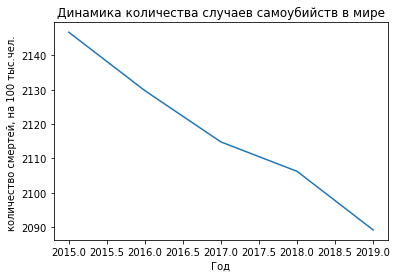

In [ ]:
plt.plot(dynamics_by_year.index, dynamics_by_year['val'])
plt.title('Динамика количества случаев самоубийств в мире')
plt.xlabel('Год')
plt.ylabel('количество смертей, на 100 тыс.чел. ')

### Динамика смертей в разрезе возраста и пола

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


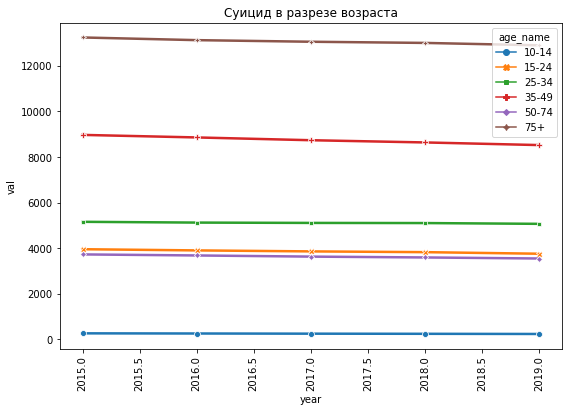

In [ ]:
# отфильтруем по полу, возьмем тот, где учувствубт оба пола и сгруппированы по возрасту.
df_by_age = df[ ((df['sex_name']=='Both') & (df['age_name']!='All ages'))]
df_age = df_by_age.groupby(['year','age_name'])['val'].sum().reset_index()
plt.figure(figsize=(9,6))
plt.title(('Суицид в разрезе возраста' ))
sns.lineplot('year', 'val', hue = 'age_name',
             data = df_age, linewidth = 2.5, style = 'age_name', markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()


Очевидно, что уровень самоубийств становится выше с увеличением возраста. То есть возраст является одной причин суицида.  Значения у возрастных групп "15-24" и "50-74" близко расположены

Посмотрим динамику в зависимости от пола

Text(0, 0.5, 'количество смертей, на 100 тыс.чел. ')

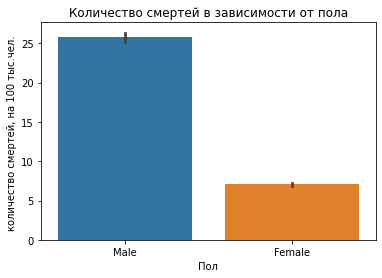

In [ ]:
df_by_gender = df[ ((df['sex_name']!='Both') & (df['age_name']!='All ages'))]
sns.barplot(x = 'sex_name' , y  = 'val' , data =df_by_gender)
plt.title(('Количество смертей в зависимости от пола' ))
plt.xlabel('Пол')
plt.ylabel('количество смертей, на 100 тыс.чел. ')

Мужчины, в среднем в 3 раза чаще заканчивают жизнь самоубийством.

In [ ]:
AgeClass=['10-14 years', '15-24 years', '25-34 years', '35-49 years', '50-74 years', '75+ years']

In [ ]:
df_by_male = df[ ((df['sex_name']=='Male') & (df['age_name']!='All ages'))]
df_male = df_by_male.groupby(['age_name'])['val'].sum().reset_index()
df_male=df_male.rename(columns={'val':'Male'}) #переименовываю столбец

In [ ]:
df_by_female = df[ ((df['sex_name']=='Female') & (df['age_name']!='All ages'))]
df_female = df_by_female.groupby(['age_name'])['val'].sum().reset_index()
df_female=df_female.rename(columns={'val':'Female'})

In [ ]:
df_gender = pd.merge(df_male, df_female,how = 'inner', on = 'age_name')
df_gender

,age_name,Male,Female
0,10-14,1577.962107,825.740139
1,15-24,28831.735950,9462.642341
2,25-34,41120.419939,9882.380735
3,35-49,70621.602365,16924.735189
4,50-74,28889.854933,8414.893495
5,75+,118305.996406,33527.144621


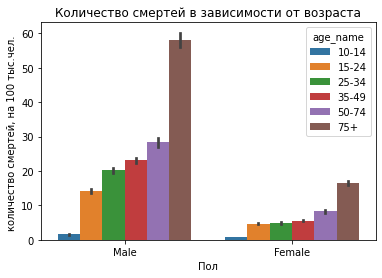

In [ ]:
sns.barplot(x = 'sex_name' , y  = 'val' ,hue = 'age_name', data = df_by_gender)
plt.title(('Количество смертей в зависимости от возраста' ))
plt.xlabel('Пол')
plt.ylabel('количество смертей, на 100 тыс.чел. ')
plt.show()

Возрастная тендеция смерти у мужчин в разрезе возрастов сохраняется.

У женщин так же большее количество смертей в старшем возрасте. При этом достаточно близко друг к другу находятся значения количества смертей для возрастных групп  15-24, 25-34 и 35 -49 лет.

Изменения уровня смертей по полу в различных возрастных группах по годам

По приведенным диаграммам видно, что за анализируемый период сохраняется динамика увеличения числа суицидов с возрастом

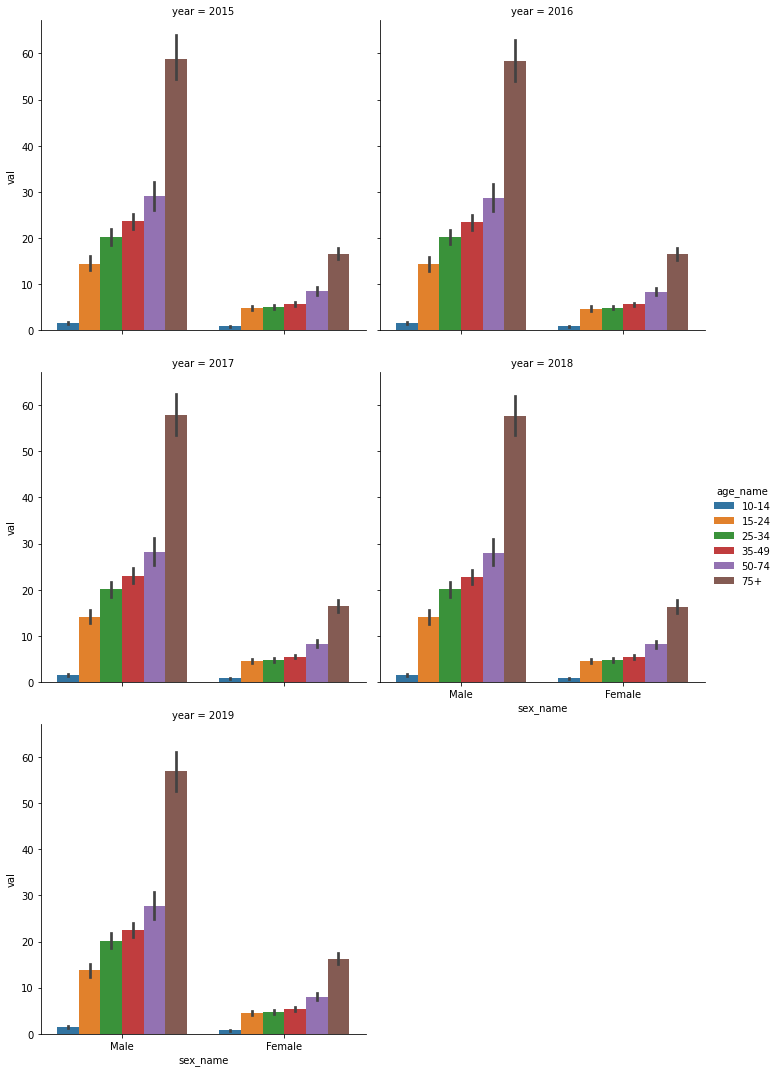

In [ ]:
sns.catplot(x = 'sex_name'  ,y='val' , hue ='age_name' , col = 'year' , data = df_by_gender
       , kind = 'bar'   ,col_wrap = 2)
plt.show()

### Рейтинг стран количеству смертей

In [ ]:
def сountry_map (sex, age):
    
  df_country = df[ ((df['sex_name']== sex) & (df['age_name']== age))].groupby('location_name').mean() # собираю дата сет для анализа по странам, не учитывая пол и возраст
  country_prop = df_country.groupby(['location_name'])['val'].mean().reset_index() #группирую по странам, сбрасываю индекс
  iso_alpha =  [countries.get(country, 'Unknown code') for country in country_prop.location_name] # создаем основу для столбца с Iso кодом и значением если страна отсутствует
  country_prop['iso_alpha'] = iso_alpha # добавляем столбец с iso кодом
  fig = px.choropleth(country_prop, locations = country_prop.iso_alpha,
                    color = country_prop.val,
                    hover_name = country_prop.location_name,
                    color_continuous_scale = px.colors.sequential.Brwnyl)
  suicide_hight = df_country.sort_values(by = 'val', ascending = False).reset_index().head(10) 
  suicide_low = df_country.sort_values(by = 'val', ascending = True).reset_index().head(10)
  """
    Функция, которая построит тепловую карту мира и две горизонтальные стоблчатые диаграммы с 10 наименьшими и наибольшаими странами по уровню самоубийств.
    Содержит 2 обязательных переменных
    sex - указывается пол для выборки
    age - возрастной диапазон
    
  """ 
  fig.update_layout(height=800, width=1000)
  fig.show() # картам мира
  
  plt.figure(figsize=(6,6)) # столбчата диаграмма по наибольшему количеству самоубийств
  sns.barplot(x='val', y='location_name', data=suicide_hight, palette="GnBu")
  plt.xlabel('уровень суицида')
  plt.ylabel('страна')
  plt.title('Топ 10 стран с наибольшим уровнем самоубийств')
  plt.show()
  
  plt.figure(figsize=(6,6))  # линейная диаграмма по наибольшему количеству самоубийств
  sns.barplot(x='val', y='location_name', data=suicide_low, palette="GnBu")
  plt.xlabel('количество случаев суицида')
  plt.ylabel('страна')
  plt.title('Топ 10 стран с наименьшим уровнем самоубийств')
  plt.show()


Построим тепловую герографическую карту, показывающую количество самоубийст по странам

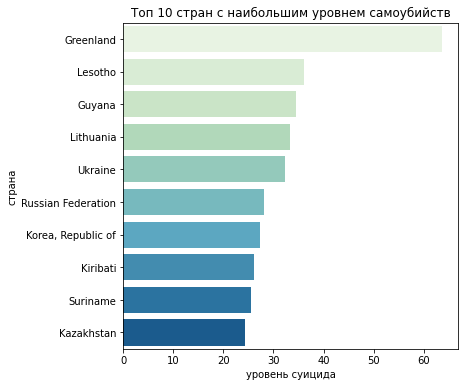

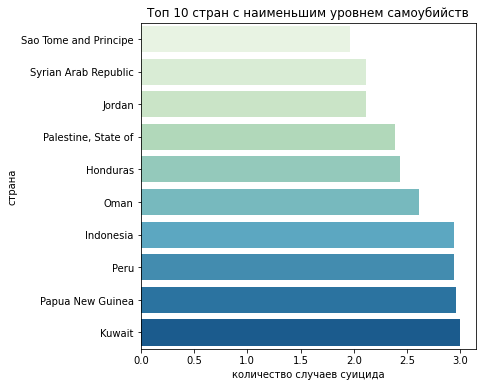

In [ ]:
сountry_map ('Both', 'All ages') # оба пола и все возраста

По нашим данным, у нас есть все страны в дата сете. 
у нас всего один регион с наибольшим число суицидов. Точнее страна: Гренландия. Стран с низким уровнем самоубийств много и их георгафиря разнообразна. Это и часть Южной Америки и страны Африки.





 Рассмотрим географию самоубийств у мужчин и женщин

География самоубийств среди женского населения

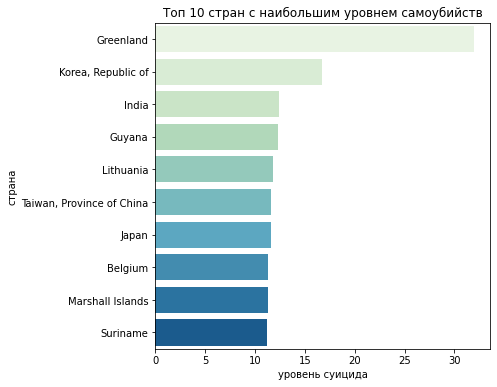

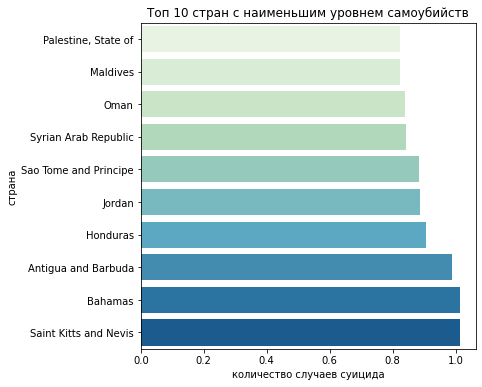

In [ ]:
сountry_map ('Female', 'All ages')

Среди женского населения, почти сохраняется такая же георграфия суицидов, как и при анализи смертоности без учета пола.
Гренландия занимает лидирующие позиции. 

В отличие от основной георафии на одно из лидирующих мест выходит Индия.

География числа суицида среди мужского населения

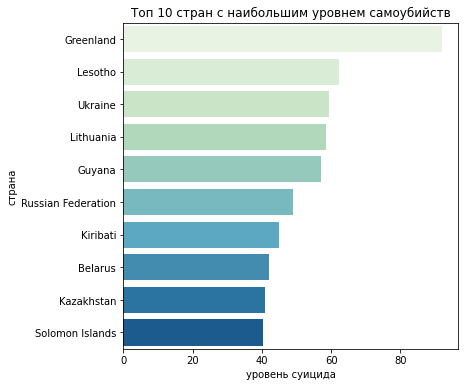

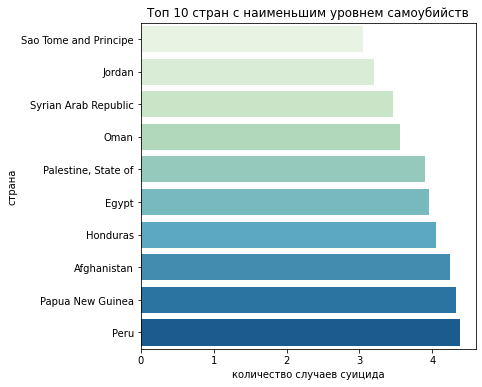

In [ ]:
сountry_map ('Male', 'All ages')

География по самоубийствам среди мужчин всех возрастов очень схожа  с георгафией по всем полам и возрастам. Это объясняется тем, что мужчины чаще заканчивают жизнь самобоубийством, чем женщины

## Данные по Happy Planet Index
<a id='task22'></a>

Индекс измеряет показатели удовлетворённости жителей каждой страны и среднюю продолжительность их жизни в соотношении с количеством потребляемых ими природных ресурсов. Экономические показатели в методологии расчёта Индекса не используются.

Главная задача индекса — отразить «действительное» благосостояние наций. Для сравнения уровня жизни в разных странах используются значения ВВП на душу населения или ИЧР, но эти индексы не всегда могут отразить реальное положение вещей. В частности, сравнение значения ВВП считается неуместным, поскольку конечная цель большинства людей — не быть богатыми, а быть счастливыми и здоровыми.

### Подготовка дата сета Happy Planet Index

In [ ]:
df_hpi = pd.read_csv('https://raw.githubusercontent.com/liakzer/python/main/data/hpi.csv', sep=';',na_values ='') #загружаем даныне по индексу счастья
df_hpi.info() #у нас есть пропуски в оценку индекса счастья.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HPI rank                     725 non-null    float64
 1   Country                      760 non-null    object 
 2   ISO                          760 non-null    object 
 3   Continent                    760 non-null    int64  
 4   Unnamed: 4                   760 non-null    object 
 5   Population (thousands)       760 non-null    float64
 6   Year                         760 non-null    int64  
 7   LifeExp (years)              760 non-null    float64
 8   Ladder of life (0-10)        735 non-null    float64
 9   Footprint (g ha)             750 non-null    float64
 10  HPI                          725 non-null    float64
 11  Biocapacity for year (g ha)  760 non-null    float64
 12  GDP per capita ($)           744 non-null    float64
dtypes: float64(8), int64

In [ ]:
df_hpi.head() # Вывод первых 5 строк датасета

,HPI rank,Country,ISO,Continent,Unnamed: 4,Population (thousands),Year,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($)
0,146.0,Afghanistan,AFG,6,2019AFG,38041.757,2019,64.8,2.375092,0.732092,29.409203,1.56,2065.036398
1,36.0,Albania,ALB,7,2019ALB,2880.913,2019,78.6,4.995318,1.953726,51.033094,1.56,13724.058790
2,62.0,Algeria,DZA,4,2019DZA,43053.054,2019,76.9,4.744627,2.223160,46.488950,1.56,11510.557090
3,43.0,Argentina,ARG,1,2019ARG,44780.675,2019,76.7,6.085561,3.191470,49.988726,1.56,22063.904370
4,20.0,Armenia,ARM,7,2019ARM,2957.728,2019,75.1,5.488087,1.521646,54.733934,1.56,13653.749530


In [ ]:
df2 = df_hpi.groupby('Country')['HPI'].sum() # подсчитаем количество стран в списке
country_name2 = list(df2.index.get_level_values(0))
len(country_name2)

152

In [ ]:
# сверяем имена стран, чтобы не было различий в написании
country_not_in_list2 = [i for i in country_name2[:] if i not in countries.keys()]
country_not_in_list2

['Bolivia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Czech Republic',
 'Iran',
 'Laos',
 'Moldova',
 'Russia',
 'South Korea',
 'Taiwan',
 'Tanzania',
 'United States of America',
 'Venezuela',
 'Vietnam']

In [ ]:
df_hpi.replace('Bolivia','Plurinational State of', inplace = True)
df_hpi.replace('Congo (Brazzaville)',  'Congo', inplace = True)
df_hpi.replace('Congo (Kinshasa)', 'Congo, The Democratic Republic of the', inplace = True)
df_hpi.replace('Iran', 'Iran (Islamic Republic of)',inplace = True)
df_hpi.replace("Cote d'Ivoire", "Côte d'Ivoire", inplace = True)
df_hpi.replace('Czech Republic', 'Czechia', inplace = True)
df_hpi.replace("South Korea",'Korea, Republic of', inplace = True)
df_hpi.replace( 'Moldova','Republic of Moldova', inplace = True)
df_hpi.replace( 'Russia','Russian Federation', inplace = True)
df_hpi.replace('Laos', "Lao People's Democratic Republic", inplace = True)
df_hpi.replace('Vietnam', 'Viet Nam', inplace = True)
df_hpi.replace('Taiwan', 'Taiwan, Province of China', inplace = True)
df_hpi.replace('United States of America', 'United States', inplace = True)
df_hpi.replace('Venezuela','Venezuela, Bolivarian Republic of',   inplace = True)

In [ ]:
df_hpi.head() # смотрим данные в таблице

,HPI rank,Country,ISO,Continent,Unnamed: 4,Population (thousands),Year,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($)
0,146.0,Afghanistan,AFG,6,2019AFG,38041.757,2019,64.8,2.375092,0.732092,29.409203,1.56,2065.036398
1,36.0,Albania,ALB,7,2019ALB,2880.913,2019,78.6,4.995318,1.953726,51.033094,1.56,13724.058790
2,62.0,Algeria,DZA,4,2019DZA,43053.054,2019,76.9,4.744627,2.223160,46.488950,1.56,11510.557090
3,43.0,Argentina,ARG,1,2019ARG,44780.675,2019,76.7,6.085561,3.191470,49.988726,1.56,22063.904370
4,20.0,Armenia,ARM,7,2019ARM,2957.728,2019,75.1,5.488087,1.521646,54.733934,1.56,13653.749530


В датасете есть 3 лишних столбца HPI rank, Continent и Unnamed: 4, уберем их. Они нам не понадобятся

In [ ]:
df_hpi = df_hpi[['Country','ISO','Population (thousands)', 'Year', 'LifeExp (years)',
       'Ladder of life (0-10)', 'Footprint (g ha)', 'HPI',
       'Biocapacity for year (g ha)', 'GDP per capita ($)']]

In [ ]:
df_hpi.describe() # изучим структуру данных

,Population (thousands),Year,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($)
count,7.600000e+02,760.000000,760.000000,735.000000,750.000000,725.000000,760.000000,744.000000
mean,4.867277e+04,2017.000000,72.586919,5.471724,3.266578,44.231272,1.588000,21351.736380
std,1.616391e+05,1.415145,7.838368,1.122965,2.430140,7.832556,0.019403,21413.919487
min,2.711280e+02,2015.000000,50.900000,2.375092,0.515749,22.348251,1.560000,751.663957
25%,4.818905e+03,2016.000000,66.775000,4.630803,1.481374,38.579845,1.570000,4792.287556
50%,1.107750e+04,2017.000000,74.450000,5.481311,2.458404,44.453013,1.600000,12914.175155
75%,3.640515e+04,2018.000000,78.300000,6.264960,4.469769,49.734753,1.600000,31537.834882
max,1.433784e+06,2019.000000,84.900000,7.858107,15.037589,64.166492,1.610000,114304.044200


У нас есть пропуски данных.Посмотрим на сколько они существенны.
Визуализируем их

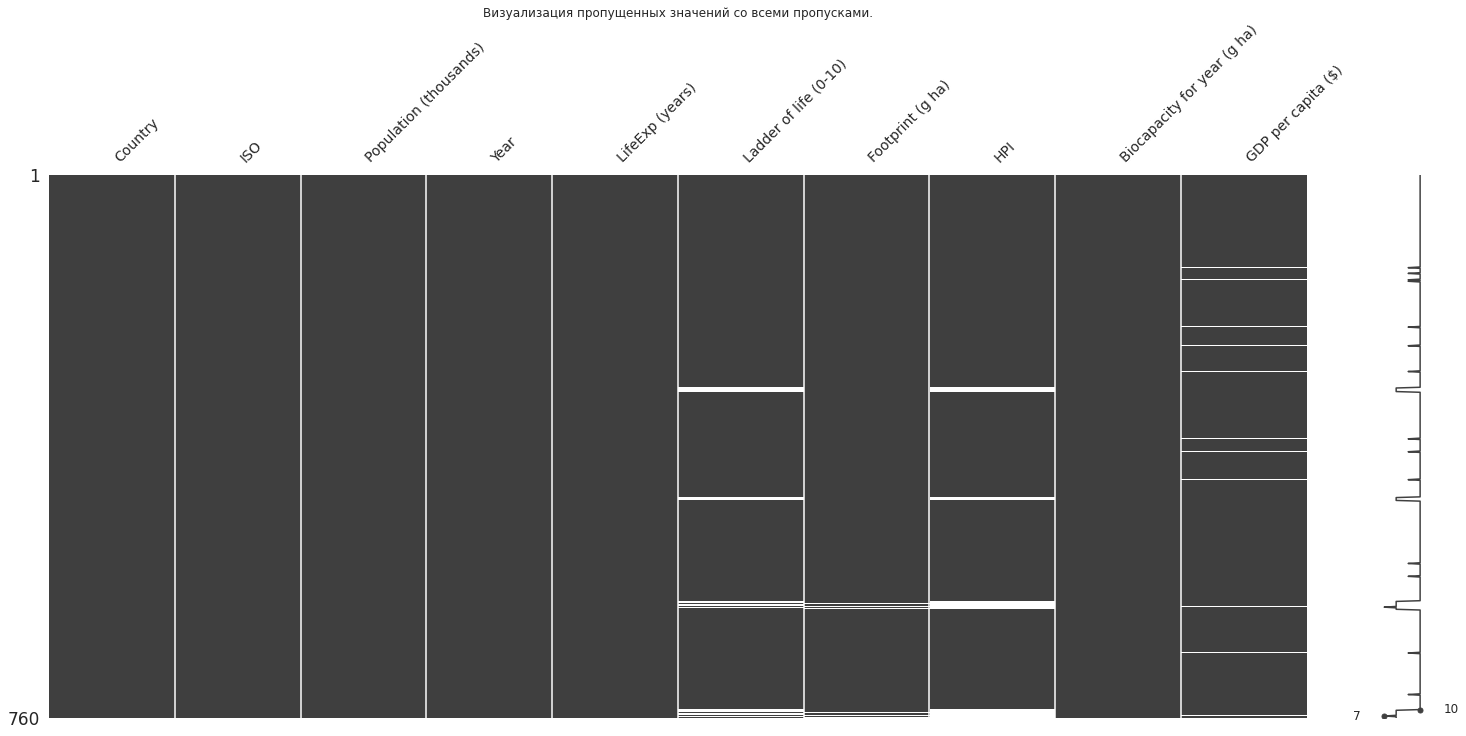

In [ ]:
missingno.matrix(df_hpi, fontsize = 14) # Передаем в качестве аргументов датафрейм, а также указываем размер шрифта
plt.title(('Визуализация пропущенных значений со всеми пропусками.' ))
plt.show()

Из диаграммы видно, что не все страны получили участвовали в индексе.
Об этом говорят пропуски в HPI,Ladder of life,  Footprint и GDP per capita ($).

Авторы индекса при его составлении не используют в расчете уровень ВВП, это видно и по визуализации пропусков. Т.к. есть страны без значения в столбце  GDP per capita ($), но при этом они получили оценку в РЗШ. Это говорит о том, что эта информация носит информационный характер.

При этом качество жизни и экологических след являются основным элементов расчета индекса счастья.

Посморим на страны, которые не были оценены. 

In [ ]:
df_hpi_only = df_hpi[['Country','ISO','Population (thousands)', 'Year', 'LifeExp (years)',
       'Ladder of life (0-10)', 'Footprint (g ha)', 'HPI',
       'Biocapacity for year (g ha)']]

In [ ]:
df_hpi_blanks=df_hpi[df_hpi['HPI'].isnull() == True]
df_hpi_blanks

,Country,ISO,Population (thousands),Year,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($)
298,Bhutan,BTN,754.396,2018,71.5000,NaN,4.505679,NaN,1.57,11348.472040
299,Central African Republic,CAF,4666.375,2018,52.8000,NaN,1.188435,NaN,1.57,933.109551
300,"Congo, The Democratic Republic of the",COD,84068.092,2018,60.4000,NaN,0.742807,NaN,1.57,1085.893701
301,Qatar,QAT,2781.682,2018,80.1000,NaN,14.910703,NaN,1.57,90970.224420
302,Sudan,SDN,41801.532,2018,65.1000,NaN,1.336277,NaN,1.57,4160.597868
303,Trinidad and Tobago,TTO,1389.841,2018,73.4000,NaN,8.196677,NaN,1.57,26272.908400
451,Bhutan,BTN,745.563,2017,71.1000,NaN,4.372489,NaN,1.60,11142.399950
452,Comoros,COM,813.890,2017,63.9000,NaN,1.141347,NaN,1.60,3032.254682
453,Eswatini,SWZ,1124.808,2017,58.3000,NaN,1.883967,NaN,1.60,8408.454272
454,Qatar,QAT,2724.727,2017,80.0000,NaN,14.720377,NaN,1.60,91738.853800


In [ ]:
# \ считаю сколько раз страны не учавоствовали в рейтинге 
hpi_blanks_counts=df_hpi_blanks[['Country', 'Year']].sort_values( by = 'Year', ascending = True).groupby('Country').count().reset_index() 
hpi_blanks_counts

,Country,Year
0,Bhutan,3
1,Central African Republic,2
2,Comoros,3
3,"Congo, The Democratic Republic of the",1
4,Eswatini,3
5,Hong Kong,2
6,Iceland,2
7,Lao People's Democratic Republic,2
8,Lesotho,1
9,Qatar,3


За анализируемый 5 летний период Судан, только однажды был оценен. 
Congo, The Democratic Republic of the	и Lesotho только однажды не учавствовали в рейтинге.

Для чистоты анализа, уберем из анализа все страны с пропусками.

In [ ]:
lost_countries = pd.merge(df_hpi,hpi_blanks_counts, how='left', on = 'Country' ) # объединяю таблицу с индексом и странами с пропусками.
lost_countries.head(10) #проверяю корректность заполнения

,Country,ISO,Population (thousands),Year_x,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($),Year_y
0,Afghanistan,AFG,38041.757,2019,64.8,2.375092,0.732092,29.409203,1.56,2065.036398,NaN
1,Albania,ALB,2880.913,2019,78.6,4.995318,1.953726,51.033094,1.56,13724.058790,NaN
2,Algeria,DZA,43053.054,2019,76.9,4.744627,2.223160,46.488950,1.56,11510.557090,NaN
3,Argentina,ARG,44780.675,2019,76.7,6.085561,3.191470,49.988726,1.56,22063.904370,NaN
4,Armenia,ARM,2957.728,2019,75.1,5.488087,1.521646,54.733934,1.56,13653.749530,NaN
5,Australia,AUS,25203.200,2019,83.4,7.233995,7.525196,43.114373,1.56,49609.044030,NaN
6,Austria,AUT,8955.108,2019,81.5,7.195361,6.054527,46.813029,1.56,56011.611220,NaN
7,Azerbaijan,AZE,10047.719,2019,73.0,5.173389,1.968941,48.034540,1.56,14402.463860,NaN
8,Bahrain,BHR,1641.164,2019,77.3,7.098012,9.796565,33.592974,1.56,45010.711500,NaN
9,Bangladesh,BGD,163046.173,2019,72.6,5.114217,0.875011,54.467041,1.56,4753.726947,NaN


In [ ]:
hpi_clear = lost_countries[lost_countries['Year_y'].isnull() == True] # оставляю только те страны, которые участвовали в рейтингне все 5 лет
del hpi_clear['Year_y'] # удаляю не нужный столбец

hpi_clear

,Country,ISO,Population (thousands),Year_x,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($)
0,Afghanistan,AFG,38041.757,2019,64.8,2.375092,0.732092,29.409203,1.56,2065.036398
1,Albania,ALB,2880.913,2019,78.6,4.995318,1.953726,51.033094,1.56,13724.058790
2,Algeria,DZA,43053.054,2019,76.9,4.744627,2.223160,46.488950,1.56,11510.557090
3,Argentina,ARG,44780.675,2019,76.7,6.085561,3.191470,49.988726,1.56,22063.904370
4,Armenia,ARM,2957.728,2019,75.1,5.488087,1.521646,54.733934,1.56,13653.749530
...,...,...,...,...,...,...,...,...,...,...
742,Guinea,GIN,11432.096,2015,59.6,3.504694,1.560902,30.413976,1.61,2087.784046
743,Chad,TCD,14110.971,2015,53.1,4.322675,1.725249,29.959603,1.61,1857.107337
744,Luxembourg,LUX,566.741,2015,81.6,6.701571,12.757934,29.012078,1.61,110798.736200
745,Liberia,LBR,4472.229,2015,62.3,2.701591,1.176410,28.588511,1.61,1580.478874


### Анализ индекса

Посмотрим как меняется индекс счастья в период с 2015 по  2019 года

In [ ]:
df_hpi_years=hpi_clear.groupby('Year_x').sum()

Text(0, 0.5, 'Индекс счастья ')

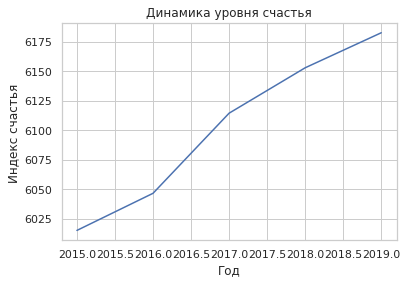

In [ ]:
plt.plot(df_hpi_years.index, df_hpi_years['HPI'])
plt.title('Динамика уровня счастья')
plt.xlabel('Год')
plt.ylabel('Индекс счастья ')

Как видим уровень счастья с каждым годом в странах повышается. 

Изучим распредление основных показателей

In [ ]:
colunms = [ 'LifeExp (years)', 'Ladder of life (0-10)', 'Footprint (g ha)',
       'Biocapacity for year (g ha)']

Убираем стоблец с численностью населения - Population (thousands). Он носит информационный характер, а так же временно уберем столбец GDP per capita ($) - т.к. его значения достаточно большие, то они внесут искажение в диаграмму "Ящик с усами"

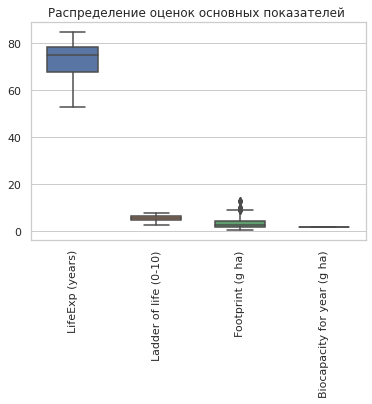

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = hpi_clear[colunms], width=0.6)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title(('Распределение оценок основных показателей '  ))
plt.show()

Как видим из диаграммы, наибольшее влияение оказывает ожидаемый срок жизни, затем идет Footprint (g ha), у данного показателя имеются выбросы

In [ ]:
colunms = [ 'LifeExp (years)', 'Ladder of life (0-10)', 'Footprint (g ha)',
       'Biocapacity for year (g ha)','GDP per capita ($)'] # Вернем обратно уровень ВВП, посмотрим на какие показатели он оказывает влияние

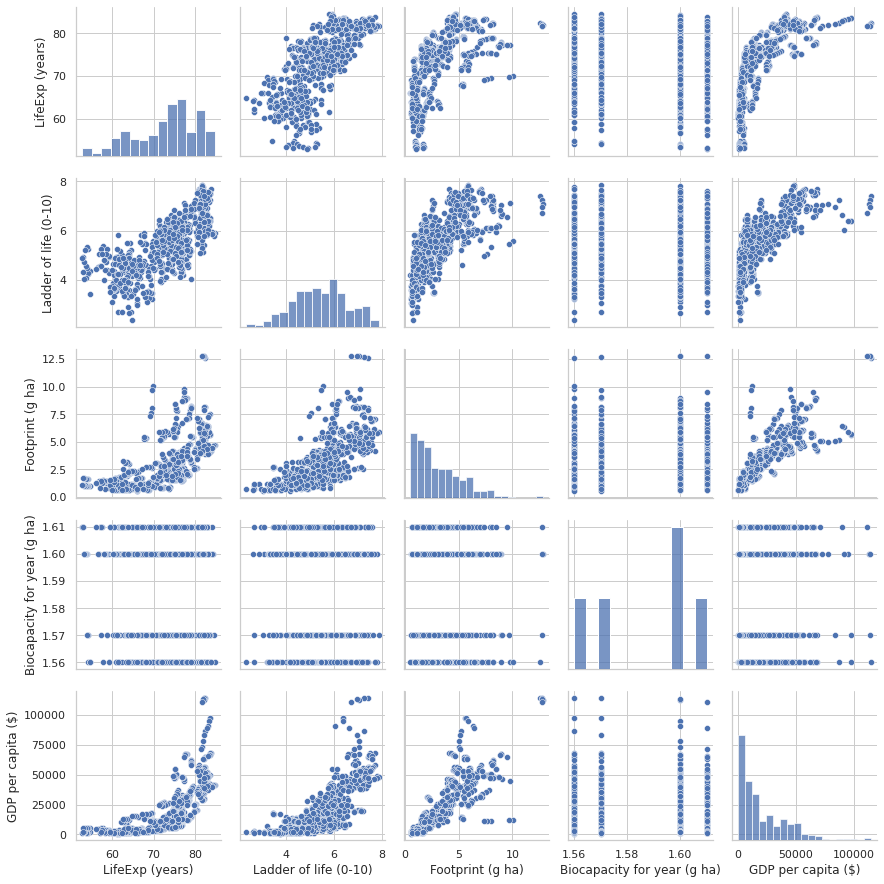

In [ ]:
sns.pairplot(hpi_clear[colunms],palette='gnuplot_r')

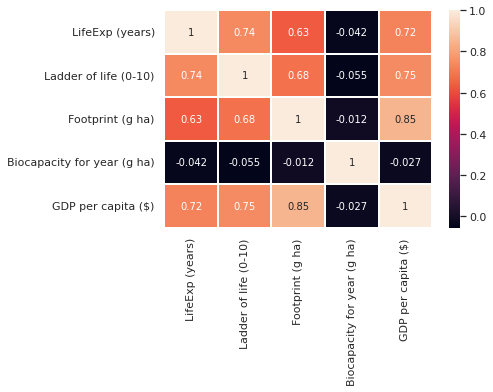

In [ ]:
corr = hpi_clear[colunms].corr()
ax = sns.heatmap(corr, cbar=True, annot=True, annot_kws={"size":10},
                  linewidths=1, linecolor='white')

Коррелиция показателя Biocapacity for year (g ha) носит отрицательных характер и практически равна нулю. Остальные имеют очень высокий уровень корреляции

### Рейтинг стран по уровню HPI

Посмотрим карту распределения Happy planet Index

In [ ]:
fig_hpi = px.choropleth(hpi_clear, locations = hpi_clear.ISO,
                    color = hpi_clear.HPI,
                    hover_name = hpi_clear.Country,
                    color_continuous_scale = px.colors.sequential.Brwnyl)

fig_hpi.update_layout(height=800, width=1000)

fig_hpi.show()

Южная Америка содержит в себе наибольшее число счатливых стран, на втором месте это  Северо-западная Африка и Западная Европа

На карте видны отсутсвующие страны, боольше всего пропусков в  центральной части Африки. 

Посмотрим рейтинг из самых счастливых и несчатливых стран

In [ ]:
df_hpi_hight= hpi_clear.groupby('Country').mean().sort_values(by = 'HPI', ascending=False).reset_index().head(10) # создаю датафрейм с 10ю наиболее счастливыми странами
df_hpi_hight

,Country,Population (thousands),Year_x,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($)
0,Costa Rica,4948.8200,2017.0,79.92,7.070699,2.608879,62.730650,1.588,19591.288418
1,Colombia,48921.2116,2017.0,76.90,6.222488,1.943249,58.833434,1.588,14317.541730
2,Panama,4107.1270,2017.0,78.14,6.331647,2.231840,58.650621,1.588,30147.375394
3,Ecuador,16789.3020,2017.0,76.58,5.971235,1.689463,58.560351,1.588,11600.596490
4,Guatemala,16915.9628,2017.0,73.80,6.407558,1.805686,58.427571,1.588,8346.882282
5,Switzerland,8449.8924,2017.0,83.46,7.541412,4.439383,57.512302,1.588,67165.678034
6,Nicaragua,6384.6104,2017.0,74.08,6.068941,1.779798,56.494442,1.588,5709.674107
7,Honduras,9429.2704,2017.0,74.90,5.670410,1.560215,55.841460,1.588,5528.249424
8,Jamaica,2920.2488,2017.0,74.30,5.899759,1.722275,55.840183,1.588,9623.891685
9,New Zealand,4700.4028,2017.0,82.00,7.309290,4.333785,55.616557,1.588,42134.225162


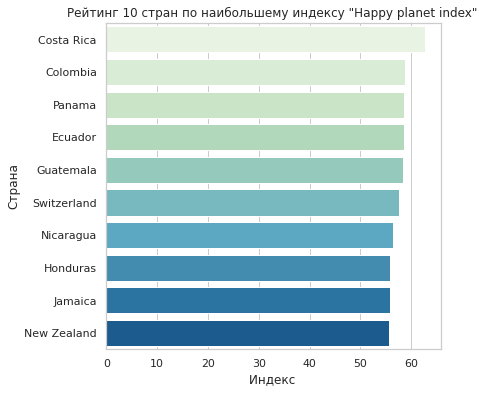

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='HPI', y='Country', data=df_hpi_hight , 
            palette="GnBu")
plt.xlabel('Индекс ')
plt.ylabel('Страна')
plt.title('Рейтинг 10 стран по наибольшему индексу "Happy planet index" ')
plt.show()

Коста Рика лидирует в списке 10 счастливых стран в перид с 2015 по 2019 гг

In [ ]:
df_hpi_low=hpi_clear.groupby('Country').mean().sort_values(by = 'HPI', ascending=True).reset_index().head(10) # создаю датафрейм с 10ю наиболее несчастными странами
df_hpi_low

,Country,Population (thousands),Year_x,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($)
0,Mongolia,3112.7918,2017.0,69.50,5.280220,8.548199,25.961446,1.588,11501.506444
1,Luxembourg,591.5790,2017.0,81.96,7.075388,12.719727,30.381505,1.588,113023.732300
2,Chad,15022.7998,2017.0,53.68,4.329617,1.698736,30.420729,1.588,1657.427281
3,Botswana,2208.6974,2017.0,68.64,3.539647,2.655947,31.857705,1.588,17297.106852
4,Kuwait,4038.5886,2017.0,75.30,6.078653,8.108030,32.458097,1.588,52146.124876
5,Turkmenistan,5755.6634,2017.0,67.96,5.400512,5.309334,32.747220,1.588,13901.599890
6,Zimbabwe,14233.1728,2017.0,60.66,3.477379,1.025440,33.040449,1.588,2977.433333
7,Sierra Leone,7490.5076,2017.0,53.84,4.296840,0.999603,33.196740,1.588,1637.310087
8,Bahrain,1500.4654,2017.0,77.04,6.433010,8.588358,33.713606,1.588,46999.238614
9,United Arab Emirates,9502.5138,2017.0,77.64,6.750659,9.031150,34.211721,1.588,66600.137756


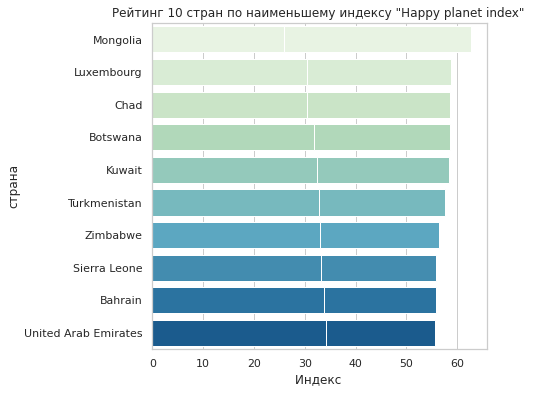

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='HPI', y='Country', data=df_hpi_hight , 
            palette="GnBu")
sns.barplot(x='HPI', y='Country', data=df_hpi_low , 
            palette="GnBu")
plt.xlabel('Индекс ')
plt.ylabel('страна')
plt.title('Рейтинг 10 стран по наименьшему индексу "Happy planet index" ')
plt.show()

Самой несчатной страной за 5-ти летний период является Монголия


## Данные по World Hapiness Report
<a id='task23'></a>

При составлении рейтинга учитываются такие показатели благополучия, как уровень ВВП на душу населения, ожидаемая продолжительность жизни, наличие гражданских свобод, чувство безопасности и уверенности в завтрашнем дне, стабильность семей, гарантии занятости, уровень коррупции, а также косвенные показатели состояния общества, такие как уровень доверия, великодушие и щедрость. 

### Подготовка данных 
Загрузим датасеты по World Hapiness Report, проверим чтобы у них был единый формат

In [ ]:
df_whr_1 = pd.read_csv('https://raw.githubusercontent.com/liakzer/python/main/data/WHR/2015.csv')
df_whr_1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
df_whr_2 = pd.read_csv('https://raw.githubusercontent.com/liakzer/python/main/data/WHR/2016.csv',sep=';')
df_whr_2.columns

Index(['Country', 'Happiness score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia (2.33) + residual'],
      dtype='object')

In [ ]:
df_whr_3 = pd.read_csv('https://raw.githubusercontent.com/liakzer/python/main/data/WHR/2017.csv',sep=';')
df_whr_3.columns

Index(['Country', 'Happiness score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia (1.85) + residual'],
      dtype='object')

In [ ]:
df_whr_4 = pd.read_csv('https://raw.githubusercontent.com/liakzer/python/main/data/WHR/2018.csv',sep=';')
df_whr_4.columns


Index(['Country', 'Happiness score', 'Dystopia (1.92) + residual',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
df_whr_5 = pd.read_csv('https://raw.githubusercontent.com/liakzer/python/main/data/WHR/2019.csv',sep=';')
df_whr_5.columns

Index(['Country', 'Happiness score', 'Dystopia (1.88) + residual',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

В первом файле есть лишние стобцы, так же имена отличаются. Приведем их к единому виду. Дополнительно добавим столбец с номером года.




In [ ]:
df_whr_1 = df_whr_1[['Country', 'Happiness Score',
        'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 
       'Generosity','Trust (Government Corruption)', 'Dystopia Residual']]

In [ ]:
df_whr_1.rename (columns = {'Happiness Score':'Happiness score','Economy (GDP per Capita)':'GDP per capita', 'Family':'Social support',
       'Health (Life Expectancy)':'Healthy life expectancy', 'Freedom':'Freedom to make life choices', 
      'Trust (Government Corruption)':'Perceptions of corruption'}, inplace = True)
df_whr_2.rename (columns = {'Dystopia (2.33) + residual':'Dystopia Residual'}, inplace = True)
df_whr_3.rename (columns = {'Dystopia (1.85) + residual':'Dystopia Residual'}, inplace = True)
df_whr_4.rename (columns = {'Dystopia (1.92) + residual':'Dystopia Residual'}, inplace = True)
df_whr_5.rename (columns = {'Dystopia (1.88) + residual':'Dystopia Residual'}, inplace = True)

In [ ]:
df_whr_1['Year']= 2015
df_whr_2['Year']= 2016
df_whr_3['Year']= 2017
df_whr_4['Year']= 2018
df_whr_5['Year']= 2019

In [ ]:
frames = [df_whr_1, df_whr_2, df_whr_3,df_whr_4,df_whr_5] # собираю датасеты в один
df_whr = pd.concat(frames, sort = False).reset_index() # сбрасываем индекс, т.к. объединение таблиц их дублирует
df_whr.head()

,index,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual,Year
0,0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2015
1,1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2015
2,2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2015
3,3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,2015
4,4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,2015


In [ ]:
del df_whr['index'] # удаляем лишний столбец с индексом

In [ ]:
df_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       782 non-null    object 
 1   Happiness score               782 non-null    float64
 2   GDP per capita                782 non-null    float64
 3   Social support                782 non-null    float64
 4   Healthy life expectancy       782 non-null    float64
 5   Freedom to make life choices  782 non-null    float64
 6   Generosity                    782 non-null    float64
 7   Perceptions of corruption     782 non-null    float64
 8   Dystopia Residual             782 non-null    float64
 9   Year                          782 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 61.2+ KB


Согласно данным, пропуски у нас отсутсвуют.

In [ ]:
df_whr.describe() # изучим структуру данных

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,5.379010,0.915243,1.079052,0.612551,0.411579,0.218688,0.125508,2.016385,2016.993606
std,1.127457,0.405628,0.329457,0.248362,0.153093,0.122347,0.105765,0.555952,1.417364
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183000,2015.000000
25%,4.509750,0.606500,0.870406,0.440181,0.310499,0.130000,0.054249,1.680337,2016.000000
50%,5.322000,0.982000,1.125000,0.647281,0.431330,0.202000,0.091000,2.022000,2017.000000
75%,6.189500,1.236250,1.327250,0.808000,0.531000,0.279705,0.156023,2.369250,2018.000000
max,7.769000,1.871000,1.644000,1.141000,0.724000,0.838000,0.551910,3.837715,2019.000000


Приведем написание стран к единому виду

In [ ]:
df3_whr = df_whr.groupby('Country')['Happiness score'].sum() # подсчитаем количество стран в списке
country_name3 = list(df3_whr.index.get_level_values(0))
len(country_name3)

170

In [ ]:
country_not_in_list3 = [i for i in country_name3[:] if i not in countries.keys()] # ищем страны с названием не совпадающим с общепринятым наименованием
country_not_in_list3

['Bolivia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Czech Republic',
 'Hong Kong S.A.R. of China',
 'Hong Kong S.A.R., China',
 'Hong Kong SAR, China',
 'Iran',
 'Ivory Coast',
 'Kosovo',
 'Laos',
 'Macedonia',
 'Moldova',
 'North Cyprus',
 'Northern Cyprus',
 'Palestinian Territories',
 'Russia',
 'Somaliland region',
 'South Korea',
 'Swaziland',
 'Syria',
 'Taiwan',
 'Taiwan Province of China',
 'Tanzania',
 'Trinidad & Tobago',
 'Venezuela',
 'Vietnam']

Некоторые страны имеют разное написание. Это может отразиться на анализе данных, т.к. они будут восприниматься как разные объекты. Приведем названи к единому виду.

В списке стран есть страны не признаные мировым сообществом:
Косово, Сомалиленд. Их переименовывать не будем.

In [ ]:
df_whr.replace('Bolivia','Bolivia, Plurinational State of', inplace= True)
df_whr.replace('Congo (Brazzaville)','Congo', inplace= True)
df_whr.replace('Congo (Kinshasa)', 'Congo, The Democratic Republic of the', inplace = True)
df_whr.replace('Czech Republic','Czechia', inplace= True)
df_whr.replace('Hong Kong S.A.R. of China', 'Hong Kong', inplace= True)
df_whr.replace('Hong Kong S.A.R., China', 'Hong Kong', inplace= True)
df_whr.replace('Hong Kong SAR, China', 'Hong Kong', inplace= True)
df_whr.replace('Iran', 'Iran (Islamic Republic of)',inplace = True)
df_whr.replace('Ivory Coast', "Côte d'Ivoire", inplace = True)
df_whr.replace('Laos', "Lao People's Democratic Republic", inplace = True)
df_whr.replace('Macedonia','North Macedonia', inplace= True)
df_whr.replace('Moldova','Republic of Moldova', inplace = True)
df_whr.replace('Northern Cyprus', 'North Cyprus', inplace= True)
df_whr.replace('Taiwan', 'Taiwan, Province of China', inplace= True)
df_whr.replace('Taiwan Province of China', 'Taiwan, Province of China', inplace= True)
df_whr.replace('Trinidad & Tobago', 'Trinidad and Tobago', inplace= True)
df_whr.replace('Russia','Russian Federation', inplace = True)
df_whr.replace('Palestine', 'Palestine, State of',inplace = True)
df_whr.replace("South Korea",'Korea, Republic of', inplace = True)
df_whr.replace('Swaziland','Eswatini', inplace= True)
df_whr.replace('Syria','Syrian Arab Republic', inplace= True)
df_whr.replace('Tanzania', 'Tanzania, United Republic of',inplace= True)
df_whr.replace('Venezuela','Venezuela, Bolivarian Republic of',   inplace = True)
df_whr.replace('Vietnam', 'Viet Nam', inplace = True)

В данных у нас нет пропусков, следовательно все страны что есть в списке имеют свои оценки. Возможно не все страны ежегодно учавоствовали в оценке уровня счастья. 
Сформируем таблицу и если таковы страны есть, уберем их из общего дата фрейма.

In [ ]:
df6=df_whr.groupby('Country').count().reset_index()  # проверим количество стран, которые имеют менее 5 оценок
df6=df6[(df6['Happiness score']!=5)][['Country','Year']] # убираем лишние столбцы
df6

,Country,Year
3,Angola,4
13,Belize,3
26,Central African Republic,4
31,Comoros,3
40,Djibouti,1
46,Eswatini,2
51,Gambia,1
79,Lao People's Democratic Republic,4
82,Lesotho,4
98,Mozambique,4


In [ ]:
whr_lost_countries = pd.merge(df_whr,df6, how = 'left', on = 'Country') # объединяем таблицы в одну
whr_lost_countries.head(10) # корректность объединения

,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual,Year_x,Year_y
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2015,NaN
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2015,NaN
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2015,NaN
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,2015,NaN
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,2015,NaN
5,Finland,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372,2.61955,2015,NaN
6,Netherlands,7.378,1.32944,1.28017,0.89284,0.61576,0.47610,0.31814,2.46570,2015,NaN
7,Sweden,7.364,1.33171,1.28907,0.91087,0.65980,0.36262,0.43844,2.37119,2015,NaN
8,New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,2.26425,2015,NaN
9,Australia,7.284,1.33358,1.30923,0.93156,0.65124,0.43562,0.35637,2.26646,2015,NaN


In [ ]:
whr_lost_countries.count()

Country                         782
Happiness score                 782
GDP per capita                  782
Social support                  782
Healthy life expectancy         782
Freedom to make life choices    782
Generosity                      782
Perceptions of corruption       782
Dystopia Residual               782
Year_x                          782
Year_y                           52
dtype: int64

In [ ]:
whr_clear = whr_lost_countries[whr_lost_countries['Year_y'].isnull() == True] # оставляем страны которые участвуют в рейтинге все 5 лет
del whr_clear['Year_y']  # удаляем лишний столбец
whr_clear.head()

,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual,Year_x
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,2015


In [ ]:
whr_clear.count()

Country                         730
Happiness score                 730
GDP per capita                  730
Social support                  730
Healthy life expectancy         730
Freedom to make life choices    730
Generosity                      730
Perceptions of corruption       730
Dystopia Residual               730
Year_x                          730
dtype: int64

### Анализ отчета о счастье

Посмотрим как изменится уровень счастья с 2015 по 2019 г

In [ ]:
df_whr_years=whr_clear.groupby('Year_x').sum()
df_whr_years

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual
Year_x,,,,,,,,
2015,790.989,127.347850,146.442520,95.65045,63.082150,34.705350,20.46488,303.298110
2016,789.999,142.410772,117.432724,83.82237,54.419572,35.429184,19.74234,336.740918
2017,791.616,148.066000,176.395000,83.92500,60.383000,36.332000,17.97600,268.518000
2018,796.139,133.670000,180.567000,90.87700,67.490000,26.646000,16.38000,280.514000
2019,802.499,137.142000,179.959000,109.95100,57.809000,26.898000,16.02700,274.726000


Text(0, 0.5, 'Индекс счастья ')

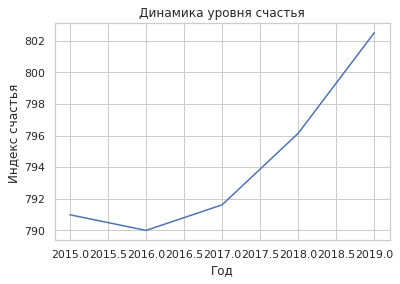

In [ ]:
plt.plot(df_whr_years.index, df_whr_years['Happiness score'])
plt.title('Динамика уровня счастья')
plt.xlabel('Год')
plt.ylabel('Индекс счастья ')

За анализируемый период в 2016 году наблюдается минимальный уровень счастья в мире. Затем он начинает резкий рост

Посмотрим на распределение оценок основных показателей.

In [ ]:
whr_clear.columns

Index(['Country', 'Happiness score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia Residual', 'Year_x'],
      dtype='object')

In [ ]:
columns2= [ 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia Residual']

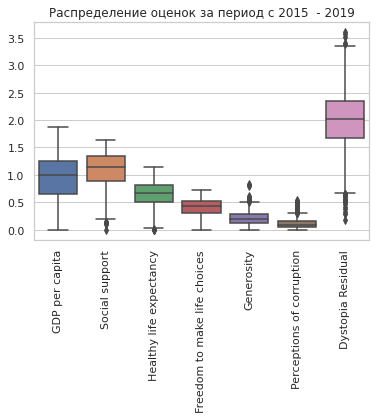

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data =whr_clear[columns2],width=0.8)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title(('Распределение оценок за период с 2015  - 2019' ))
plt.show()

На основании графика могу предположить, что наибольшую роль в оценке
оказывает "остаток негативных сценариев" (Dystopia Residual), то насколько близка страна к гипотетическому худшему сценарию.
При этом доверие к госудаству имееи наименьшее влияние на суммарную оценку уровня счастья.
Уровень коррупции, не оказывает влияние на другие показатели.

Рассмотрим подробнее взаимосвязь основных показателей.

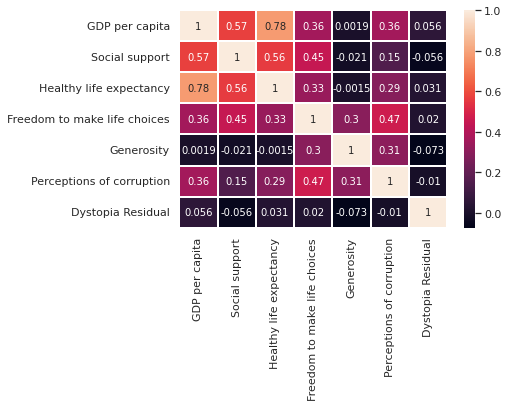

In [ ]:
corr = whr_clear[columns2].corr()
ax = sns.heatmap(corr, cbar=True, annot=True, annot_kws={"size":10},
                  linewidths=1, linecolor='white')

Проверим на сколько связан показатель (Dystopia Residual) с остальными показателями. Из данныхм матрицы, видно, что корреляция отсутвует, все данные разрознены. Можно сделать вывод о том, что вероятный сценарий не влияет на фактические показатели уровня счастья. При этом показатель доверия (Social Suppurt) имеет наилучшую корреляцию со c уровнем ВВП и уровнем жизни.

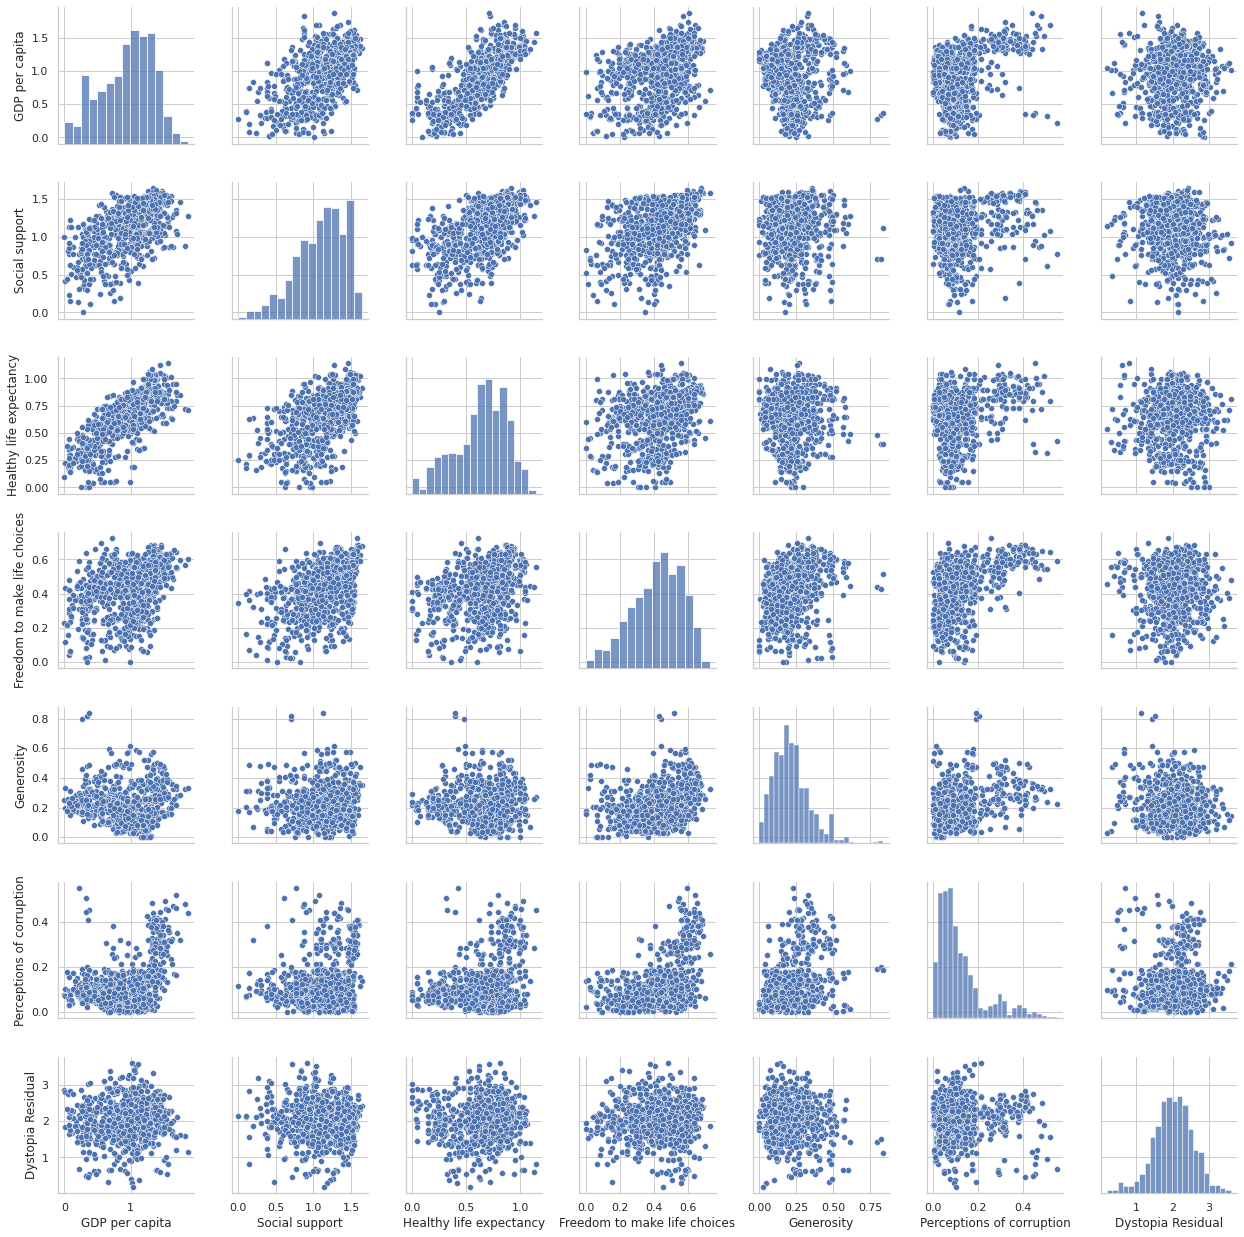

In [ ]:
sns.pairplot(whr_clear[columns2],palette='gnuplot_r')

Посмотрим на 10 наиболее счатливых и несчатных стран за период с 2015-2019 гг.

### Рейтинг стран по уровню WHR



In [ ]:
country_group = whr_clear.groupby('Country').mean().reset_index() # среднее значения по странам за анализируемый период
iso_code = [countries.get(country, 'Unknown code') for country in country_group.Country]
country_group['ISO'] = iso_code

In [ ]:
fir_whr = px.choropleth(country_group, locations = country_group.ISO,
                        color = country_group['Happiness score'],
                        hover_name = country_group.Country,
                        color_continuous_scale = px.colors.sequential.Brwnyl)

fir_whr.update_layout(height = 800, width = 1000)

fir_whr.show()

Самыми счастливыми странами, по оценки ЦРК, являются скандинавские страны, затем Канада и Австралия, затем идет Цетральная и Южная Америки.
Самыми несчатными являются страны Африки. Там же у нас имеются пропуски

In [ ]:
df_whr_hight = country_group.sort_values(by = 'Happiness score', ascending= False).reset_index().head(10) # 10 наиболее счастливых стран
df_whr_hight

,index,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual,Year_x,ISO
0,35,Denmark,7.5460,1.396653,1.447665,0.865336,0.625959,0.318820,0.429420,2.461686,2017.0,DNK
1,98,Norway,7.5410,1.519288,1.431169,0.873400,0.637963,0.328988,0.343958,2.406191,2017.0,NOR
2,42,Finland,7.5378,1.357046,1.434380,0.873805,0.621545,0.215686,0.398552,2.636903,2017.0,FIN
3,123,Switzerland,7.5114,1.472169,1.417349,0.928292,0.620628,0.277521,0.379763,2.416202,2017.0,CHE
4,55,Iceland,7.5110,1.386595,1.492898,0.917835,0.618002,0.419217,0.140239,2.536677,2017.0,ISL
5,91,Netherlands,7.4046,1.411025,1.349659,0.878630,0.589575,0.415052,0.298682,2.461837,2017.0,NLD
6,23,Canada,7.3506,1.388088,1.387342,0.900647,0.610934,0.389690,0.305772,2.368523,2017.0,CAN
7,122,Sweden,7.3192,1.403904,1.368542,0.899016,0.617597,0.336432,0.397421,2.295906,2017.0,SWE
8,92,New Zealand,7.3130,1.317568,1.439690,0.891665,0.617771,0.432804,0.400053,2.213756,2017.0,NZL
9,5,Australia,7.2762,1.394801,1.408997,0.914553,0.605121,0.416138,0.314535,2.222193,2017.0,AUS


Text(0.5, 1.0, '10 самых счастливых стран')

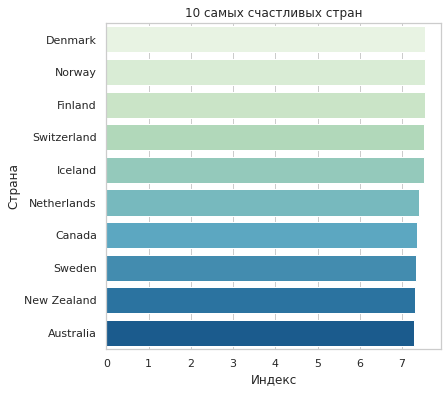

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='Happiness score', y = 'Country', data = df_whr_hight, palette ="GnBu")
plt.xlabel('Индекс')
plt.ylabel('Страна')
plt.title('10 самых счастливых стран')

По данным отчета, самыми счатливыми странами, в 5 летний период, являются скандинавские страны. 

In [ ]:
df_whr_lower = country_group.sort_values(by = 'Happiness score', ascending = True).reset_index().head(10) # 10 наиболее несчастных стран
df_whr_lower

,index,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual,Year_x,ISO
0,20,Burundi,3.0790,0.062522,0.470859,0.211685,0.101340,0.185834,0.106962,1.939413,2017.0,BDI
1,124,Syrian Arab Republic,3.2922,0.699077,0.355910,0.566373,0.081793,0.431352,0.159478,0.998694,2017.0,SYR
2,111,Rwanda,3.4386,0.322108,0.788512,0.417458,0.581641,0.226359,0.473424,0.629122,2017.0,RWA
3,127,"Tanzania, United Republic of",3.4660,0.439749,0.939383,0.396830,0.386876,0.311698,0.083692,0.907696,2017.0,TZA
4,0,Afghanistan,3.5128,0.357017,0.409844,0.254757,0.117889,0.267756,0.058061,2.047536,2017.0,AFG
5,129,Togo,3.5442,0.265781,0.323590,0.288508,0.363662,0.174796,0.101036,2.026333,2017.0,TGO
6,143,Yemen,3.6258,0.489376,0.865372,0.365423,0.244081,0.096904,0.067092,1.497416,2017.0,YEM
7,78,Madagascar,3.7454,0.265957,0.773233,0.434060,0.177336,0.193346,0.062660,1.839151,2017.0,MDG
8,16,Botswana,3.8300,1.053561,1.107501,0.338455,0.490568,0.078972,0.104687,0.656443,2017.0,BWA
9,74,Liberia,3.8392,0.089253,0.789041,0.302733,0.332959,0.238050,0.042568,2.045026,2017.0,LBR


Text(0.5, 1.0, '10 самых несчастных стран')

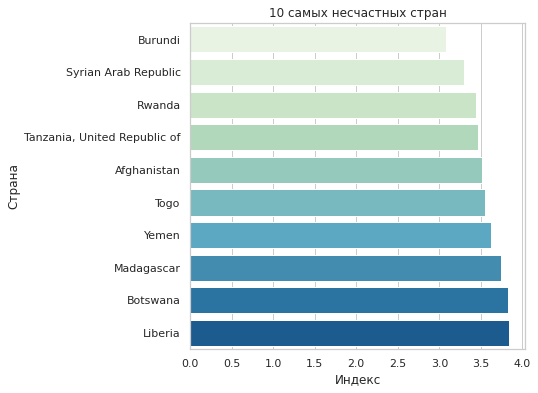

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='Happiness score', y = 'Country', data = df_whr_lower, palette ="GnBu")
plt.xlabel('Индекс')
plt.ylabel('Страна')
plt.title('10 самых несчастных стран')

Самым несчатливыми странами являются страны Африки.

# Готовим данные для статистического анализа

<a id='task3'></a>

Для выявления взаимосвязей между количеством случаев самоубийств и уровня счестья населения возьмем данные, по числу смертей за 2017 год и индексы счастья за 2016 год. 

Лаг в один год обсуловлен тем, что  индексы расчитываются с задержкой в пару лет, при этом некоторые показатели индексов расчитываются по количеству жителей за год. На примерб уровень  ВВП и продолжительность жизни. 

Есть предположение, что события в жизни населения за предыдущий год можут повлияет на частоту совершаемых самоубийств в текущем.

In [ ]:
suicide_stat = df_filtered_suicides[(df_filtered_suicides['year']==2017)] # берем 2017 год для анализа числа смертей
suicide_stat=suicide_stat[['location_name','val']]
suicide_stat.head()

,location_name,val
9077,Greenland,64.166624
2885,Lesotho,35.835752
18899,Guyana,35.007924
20450,Ukraine,32.239234
17906,Lithuania,31.979770


In [ ]:
hpi_clear_2016=hpi_clear[(hpi_clear['Year_x'])==2016] #-1 период для проверки влияния предыдущих оценок уровня счастья на смерность в текущем году
hpi_clear_2016['happy_index']=hpi_clear_2016['HPI']/10 # приведем индекс к 10 бальной шкале, для последующего удовбства анализа. переименуем столбец
hpi_clear_2016.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,ISO,Population (thousands),Year_x,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($),happy_index
456,Costa Rica,CRI,4899.336,2016,79.7,7.135618,2.710143,62.379833,1.6,19211.566760,6.237983
457,Ecuador,ECU,16491.116,2016,76.4,6.115438,1.691061,59.532547,1.6,11551.616670,5.953255
458,Colombia,COL,48175.048,2016,76.7,6.233715,2.041412,58.146794,1.6,14242.806890,5.814679
459,Guatemala,GTM,16583.079,2016,73.5,6.358916,1.839336,57.672992,1.6,8205.754475,5.767299
460,Mexico,MEX,123333.379,2016,74.9,6.824173,2.565252,57.159209,1.6,19603.308870,5.715921


In [ ]:
whr_2016 = whr_clear[(whr_clear['Year_x'])==2016] # индекс из отчета word happiness report
whr_2016.head()

,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual,Year_x
158,Denmark,7.526,1.441784,1.163745,0.795040,0.579413,0.361710,0.444532,2.739390,2016
159,Switzerland,7.509,1.527334,1.145236,0.863029,0.585572,0.280825,0.412033,2.694632,2016
160,Iceland,7.501,1.426655,1.183259,0.867333,0.566242,0.476784,0.149747,2.831373,2016
161,Norway,7.498,1.577440,1.126896,0.795789,0.596086,0.378948,0.357758,2.664645,2016
162,Finland,7.413,1.405979,1.134640,0.810914,0.571037,0.254919,0.410040,2.825965,2016


Объединим таблицы с индексами и суицидами в один датасет. Создадим столбцы со средним значением по индексам и рейтингом

In [ ]:
suicide_hpi=pd.merge(suicide_stat,hpi_clear_2016, how='inner', left_on='location_name', right_on='Country')  #объединим все оценки счастья и кол-во смертей от суицида в один датасет
suicide_vs_happy = pd.merge(suicide_hpi,whr_2016,how='inner',on='Country')
suicide_vs_happy['rating']=(suicide_vs_happy['happy_index']+suicide_vs_happy['Happiness score'])/2
 # сгруппирууем страны по среднему уровню счастья
suicide_vs_happy.loc[suicide_vs_happy.rating <4, 'group'] = 'low' 
suicide_vs_happy.loc[suicide_vs_happy.rating.between(4,8.5, inclusive=True) , 'group'] = 'middle'
suicide_vs_happy.loc[suicide_vs_happy.rating>8.5 , 'group'] = 'hight'
suicide_vs_happy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.



,location_name,val,Country,ISO,Population (thousands),Year_x_x,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,...,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual,Year_x_y,rating,group
0,Ukraine,32.239234,Ukraine,UKR,44713.708,2016,71.7,4.028690,2.785185,36.114457,...,0.872869,1.014132,0.586279,0.128589,0.203627,0.018293,1.500659,2016,3.967723,low
1,Lithuania,31.979770,Lithuania,LTU,2889.555,2016,75.2,5.865552,5.422166,38.766920,...,1.269200,1.064110,0.646744,0.189289,0.020247,0.018197,2.605253,2016,4.844846,middle
2,Russian Federation,27.175738,Russian Federation,RUS,145275.374,2016,71.8,5.854946,5.190675,37.481049,...,1.232282,1.052608,0.589906,0.326817,0.027361,0.035857,2.591155,2016,4.802052,middle
3,Belarus,24.277229,Belarus,BLR,9445.638,2016,74.0,5.177899,3.922325,39.765075,...,1.130622,1.049930,0.631036,0.290910,0.139419,0.174570,2.385816,2016,4.889254,middle
4,Kazakhstan,23.843180,Kazakhstan,KAZ,17830.902,2016,72.1,5.533552,5.849600,34.154800,...,1.229428,0.955436,0.573858,0.405202,0.150110,0.111316,2.493253,2016,4.667240,middle


In [ ]:
suicide_vs_happy.groupby('group').count()['val'] # посмотрим количество оценок по странам. Нет ни одной страны с высоким уровнем счастья

group
low        24
middle    105
Name: val, dtype: int64

# Статистический анализ
<a id='task4'></a>

## Корреляция Пирсона
<a id='task41'></a>

### Изучим взаимосвязь между World Happiness Report и Happy Planet Index

In [ ]:
col=['Happiness score','happy_index']

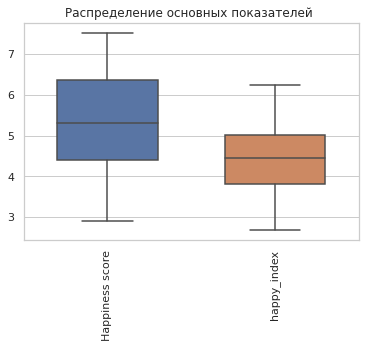

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = suicide_vs_happy[col], width=0.6)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title(('Распределение основных показателей '  ))
plt.show()

Судя по графику, оценки индекса World Happiness Report гораздо выше чем у индекса Happy Planet Index. Выборосов данных у нас нет.


Проверим  факт, что оценки World Happiness Report коррелирует с индекса Happy Planet Index.

Text(0.5, 1.0, 'Корреляция оценки World Happiness Report и индекса Happy Planet Index')

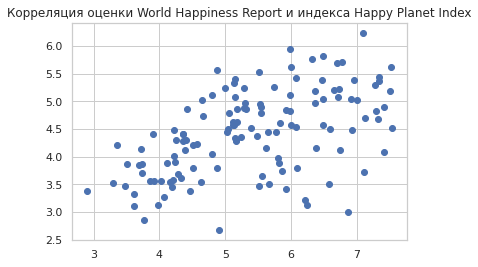

In [ ]:
plt.scatter( suicide_vs_happy['Happiness score'],suicide_vs_happy['happy_index']);
plt.title('Корреляция оценки World Happiness Report и индекса Happy Planet Index')

In [ ]:
res = stats.pearsonr(suicide_vs_happy['Happiness score'],suicide_vs_happy['happy_index'])
# Проверяем гипотезу Н0: полное отсутствии корреоляции
print('Коэф. корреляции - Pearson rho: {0}'.format(res[0])) # Коэф. корреляции
print('p-value: {0}'.format(res[1]))

Коэф. корреляции - Pearson rho: 0.5209227505838222
p-value: 2.4737072615282194e-10


Вывод: На основании полученных значений p-value есть основания отклонить H0. Зависимость есть.
Коэффициент корреляции Пирсона равен 0.520922 говорит о высокой положительной корреляции

### Исследуем взаимосвязь между уровнем самоубийств и уровнем счастья, а так же взаимосвязь между разными индексами счастья

Text(0.5, 1.0, 'Коллеляция уровня самоубийств и среднего значения уровня счастья')

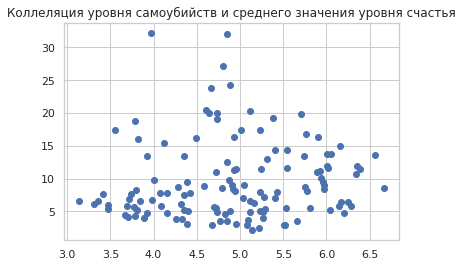

In [ ]:
plt.scatter( suicide_vs_happy['rating'],suicide_vs_happy['val']);
plt.title('Коллеляция уровня самоубийств и среднего значения уровня счастья')

По визуализации корреляции между количеством суицидов средим индексов счастья, нельзя сказать, что чем счастливее население, тем ниже смертность.  У нас есть несколько выбросов по смертности, при этом оценки счастья находятся на расстоянии друг от друга.

При оценке счастья до 3,5 баллов низкое количество самоубийств

In [ ]:
res = stats.pearsonr( suicide_vs_happy['rating'], suicide_vs_happy['val'],)
# Проверяем гипотезу Н0: полное отсутствии корреляции
print('Коэф. корреляции - Pearson rho: {0}'.format(res[0])) # Коэф. корреляции
print('p-value: {0}'.format(res[1]))

Коэф. корреляции - Pearson rho: 0.07783801662081977
p-value: 0.38059736132471456


Вывод: На основании полученых значений p-value нет оснований отклонить H0. Не достаточно оснований утверждать, что по уровню счастья можно предсказать количество случаев самоубийств.

Коэффициент корреляции Пирсона говорит о низкой положительной корреляции

## Линейная регрессия
<a id='task42'></a>

В качестве не зависимой переменной будет браться показатель субъективный индекса счастья. Субъективный показатель тот, который не имеет материальной оценки, например : уровень ВВП и зависимые от него факторов.

Для поиска взаимосвязи между рейтингом суицида и Мировым отчетом о счастье, возмем значение  из столбца Freedom to make life choices.  Этот фактор является наиболее субъективным и отражает мнение населения, т.к. он высчитывается путем отвента на вопрос: «Вы удовлетворены или не удовлетворены своей свободой выбирать, что делать со своей жизнью?»

По анализу данных видна общая взаимосвязь количества случаев суицида и уровня счастья населения. Уровень счастья стабильно растет, а количество смертей снижается. 

Рассмотрев общее влияния уровня счастья к уровню суицида, а так же на сколько пропорциональны индексы счастья друг к другу в дальнейшем имеет смысл провсти анализ частных составляющих каждого индекса к случаям самоубийств.  

Для поиска взаимосвязи будем использовать модель линейной регрессии. 

### Модель линейной регрессии для оценок уровня счастья населения



Попробуем построить модель линейной регрессии для оценок индексов уровня счастья. Возможно ли предстказать значение одного индекса на основе другого

In [ ]:
X = suicide_vs_happy[['Happiness score']].values # оценка по индексу World Happiness Report 
y = suicide_vs_happy['happy_index'].values #оценка по индексу Наppy Planet Index 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # выбираем данные для теста и обучения

In [ ]:
X_train.shape

(103, 1)

In [ ]:
y_train.shape

(103,)

In [ ]:
# тренируем модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_ # прямая зависимость 

array([0.35748892])

In [ ]:
model.intercept_

2.486813012512402

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.14114121915555988

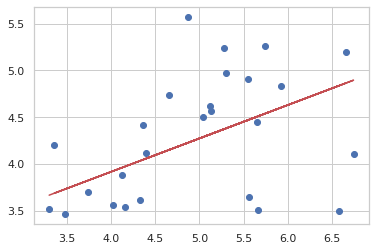

In [ ]:
# строим график линейной регресии
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

По результатам постостроения модели линейной регрессии наблюдаем прямую зависимость оценки индекса Наppy Planet Index и оценки по индексу World Happiness Report, c высоким уровнем зависимоти, т.к. коэффициент детермининации равен 0.1414. 



### Модель линейной регрессии для количества самоубийств и Ladder of life (0-10) . 



Мировой индекс счастья не включает в себя факторы основанные на опросе населения. При это авторы индекса сообщают, что Ladder of life (0-10) является субъективным показателем

In [ ]:
X = suicide_vs_happy[['Ladder of life (0-10)']].values
y = suicide_vs_happy['val'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # выбираем данные для теста и обучения

In [ ]:
X_train.shape

(103, 1)

In [ ]:
y_train.shape

(103,)

In [ ]:
# тренируем модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_ # прямая зависимость 

array([1.18631819])

In [ ]:
model.intercept_

3.536015990302902

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.01609346887278129

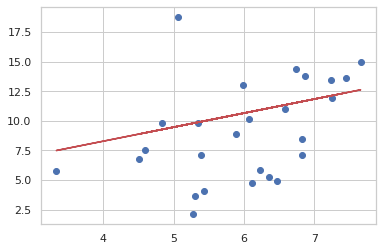

In [ ]:
# строим график линейной регресии
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

По результатам постостроения модели линейной регрессии наблюдаем прямую зависимость количества случаев суицида и качеством жизни, при этом эта зависимость высока, т.к. коэффициент детерминации равен 0.016. 

Взаимосвязь уровня жизни и самоубийств больше чем взаимосвязь свободы выбора и самоубийств

### Модель линейной регрессии для количества самоубийств и свободой выбора

In [ ]:
X = suicide_vs_happy[['Freedom to make life choices']].values
y = suicide_vs_happy['val'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # выбираем данные для теста и обучения

In [ ]:
X_train.shape

(103, 1)

In [ ]:
y_train.shape

(103,)

In [ ]:
# тренируем модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_ # замая зависимость x от y

array([3.95346964])

In [ ]:
model.intercept_

8.179099051952436

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-0.032806493301602124

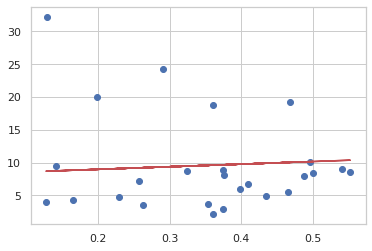

In [ ]:
# строим график линейной регресии
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

По результатам постостроения модели линейной регрессии наблюдаем прямую зависимость количества случаев суицида и уровнем свободы, при этом эта зависимость низка, т.к. коэффициент детерминации равен -0.032. Он далек от единицы